In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
!python -m pip install statsmodels
import statsmodels.api as sm
%matplotlib inline
import math
#Linear Regression
#Simple Linear Regression Y = mx +b , Where Y is labels(targets), m is slope, x is feature.
#Error function ε = y - ŷ , Where ε is error, y is labels(targets), ŷ predicted values.
#Numerator = np.sum((x - x_mean) * (y - y_mean))
#Denominator = np.sum((x - x_mean) **2)
#m = Numerator / Denominator
#b = y_mean - (m * x_mean)

In [52]:
#Multiple Linear Regression
#y=w1​x1​+w2​x2​+⋯+wn​xn​+b , This is the thing same as Simple Linear Regression except with multiple feaures and each feature has its own weight.

In [53]:
df = pd.read_csv("Advertising.csv" , index_col=0) #Read data

In [54]:
df.head()
#Money Spent on Ads and its impact on Sales

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


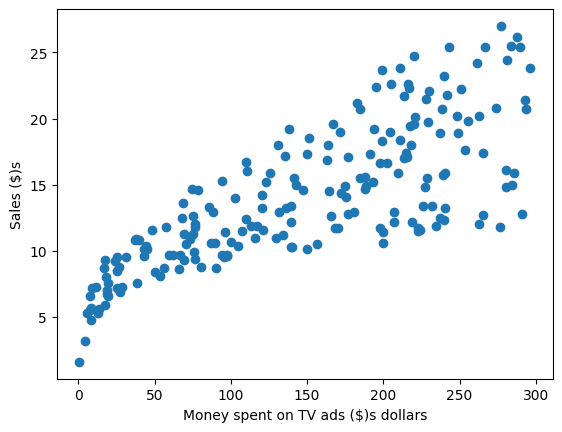

In [55]:
#Applying simple linear regression to see correlation between TV feature and target
plt.scatter(df["TV"],df["sales"])
plt.xlabel("Money spent on TV ads ($)s dollars")
plt.ylabel("Sales ($)s")
plt.show()

In [56]:
#The graph shows sign of Heteroscedasticity meaning data shrinks or spreads out, which is bad for linear regression.

In [57]:
X = df["TV"]
X.shape
#Now X and  is a 1-D array.We need to convert it to 2D because scikit-learn models expect 2D features.

(200,)

In [68]:
y= df["sales"]
y.shape

(200,)

In [70]:
y= df["sales"].values.reshape(-1,1)
y.shape

(200, 1)

In [71]:
X = df["TV"].values.reshape(-1,1)
X.shape

(200, 1)

In [72]:
reg = LinearRegression()
reg.fit(X,y)

LinearRegression()

In [74]:
print(f"Y = {reg.intercept_[0]} + {reg.coef_[0][0]}*TV")

Y = 7.032593549127695 + 0.04753664043301975*TV


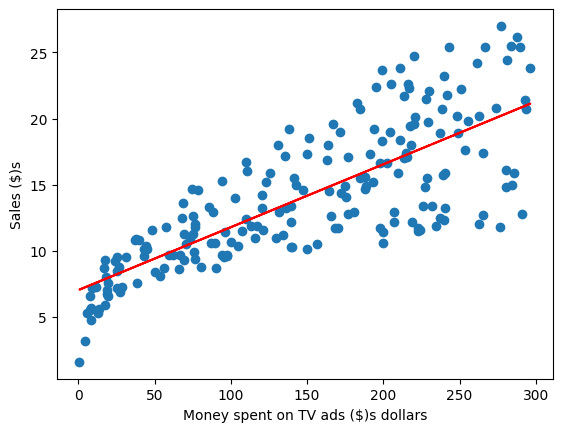

In [79]:
predictions = reg.predict(X)
plt.scatter(X,y)
plt.plot(X,predictions, color="r")
plt.xlabel("Money spent on TV ads ($)s dollars")
plt.ylabel("Sales ($)s")
plt.show()

In [80]:
#Now that we graphed the data and lr model we need to examine the correlation between X and y

In [83]:
X = df["TV"]
y = df["sales"]
exog = sm.add_constant(X)
est = sm.OLS(y, exog).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Fri, 03 Oct 2025   Prob (F-statistic):           1.47e-42
Time:                        00:08:43   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.0

In [84]:
#R squared is 0.61 so only 61% of causality is captured.

In [85]:
#Multiple Linear Regression

In [90]:
Xs = df.drop(["sales"], axis=1)
y = df["sales"].values.reshape(-1,1)



(200, 3)

In [91]:
reg = LinearRegression()
reg.fit(Xs,y)

print(f"Y = {reg.intercept_[0]} + {reg.coef_[0][0]}*TV + {reg.coef_[0][1]}*radio + {reg.coef_[0][2]}*newspaper")

Y = 2.938889369459412 + 0.0457646454553976*TV + 0.18853001691820448*radio + -0.0010374930424763285*newspaper


In [98]:
X = np.column_stack((df["TV"],df["radio"],df["newspaper"]))
y = df["sales"].values.reshape(-1,1)

exog=sm.add_constant(X)
est = sm.OLS(y, exog).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Fri, 03 Oct 2025   Prob (F-statistic):           1.58e-96
Time:                        00:26:37   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.0

In [99]:
#With 3 input features our model become better with R squared value of 0.897

In [100]:
# If we take a look at P value of x3 newspaper is bigger than 0.05 meaning its not relevant in our model and we should take it out

In [1]:
# In linear regression we predict continuous numerical values
# In logistic regression we predict a categorical variable with probability between 0 and 1

In [6]:
# To implement logistic regression we need to use sigmoid function
# Sigmoid function σ(z) = 1 / 1 + e to the power of -z , where e is euclid number ,z is wx +b
# So equation becomes 1 / 1 + pow(math.e,-wx +b)
# Logistic regression is used to predict probabilty of binary outcome like email is spam or not spam.And it's used to predict categorical values rather than continnuous values.